In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [46]:
def get_hp(torque, rpm):
    return torque * rpm / 9549 * 1.36

def rpm_to_torque(rpm, max_torque, max_torque_rpm, factor=1):
    diff_rpm_abs = abs(max_torque_rpm - rpm)
    
    if rpm < max_torque_rpm:
        return max_torque * (1 - diff_rpm_abs / max_torque_rpm * factor)
    else:
        return max_torque * (1 - diff_rpm_abs / max_torque_rpm)

In [47]:
# 300; 6000; 256;
# 400; 4000; 227

In [48]:
rpm_list = [i for i in range(1000, 7500, 500)]

In [49]:
torque_list_1 = list(map(lambda i: rpm_to_torque(i, 300, 6000), rpm_list))
hp_list_1 = list(map(lambda i: get_hp(i[0], i[1]), zip(torque_list_1, rpm_list)))

torque_list_2 = list(map(lambda i: rpm_to_torque(i, 400, 4000, .1), rpm_list))
hp_list_2 = list(map(lambda i: get_hp(i[0], i[1]), zip(torque_list_2, rpm_list)))

In [65]:
l = len(rpm_list)
df = pd.DataFrame(dict(rpm_list=rpm_list * 4, 
                       signal=torque_list_1 +  hp_list_1 + torque_list_2 + hp_list_2, 
                       car=[1] * l * 2 + [2] * l * 2,
                       signal_type=['torque'] * l + ['hp'] * l + ['torque'] * l +['hp'] * l))
df.head()

,rpm_list,signal,car,signal_type
0,1000,50.0,1,torque
1,1500,75.0,1,torque
2,2000,100.0,1,torque
3,2500,125.0,1,torque
4,3000,150.0,1,torque


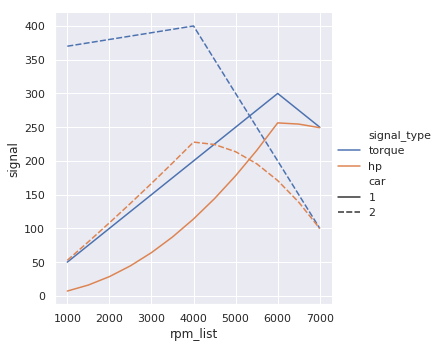

In [68]:
sns.relplot(x="rpm_list", y="signal", hue="signal_type", style="car", kind="line", data=df);